In [1]:
# Li's Project
# Adding the W-boson and b-quark channels to P-ONE

In [2]:
# imports
from constants import pdm_constants as const
from config import config
from pone_aeff import Aeff
from dm2nu import DM2Nu
from atm_shower import Atm_Shower
from detectors import Detector
import numpy as np
import matplotlib.pyplot as plt
from limit_calc import Limits
from bkgrd_calc import Background
from signal_calc import Signal
from pdm import PDM
from scipy.interpolate import UnivariateSpline
from scipy.stats import chi2
from scipy.stats import *
from pone_aeff import Aeff
import pickle
import math
import pandas as pd
import csv
from matplotlib.lines import Line2D
from matplotlib import rc
from scipy.integrate import quad
def find_nearest(array: np.array, value: float):
    
    """ Returns: index of the nearest vlaue of an array to the given number
    --------------
    idx :  float
    """
    array = np.array(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [3]:
# picture path
PICS = '../pics/'
name=[r'$\nu_{\mu}$', r"$\nu_e$", r"$\nu_{\tau}$"]  # ,r'$\nu_{e}$',r'$\nu_{\tau}$'
# Plotting standards
std_size = 6.  # Size of the plot
fontsize = 15.  # Fontsize in the plot
lw=0.1  # Linewidth
h_length=0.5  # Handle length for the legends
export_dpi = 500  # Dpi for the image export
color_pone='#7570b3'
color_ice='#e7298a'
color_combined='#33a02c'
color_thermal='#1f78b4'
color_unitary='k'
color_4='#1b9e77'
color_6='#d95f02'
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [4]:
surface_fluxe = pickle.load(open("../data/" +
                                                   "surf_store_v1.p", "rb"))
#projection_ice = pickle.load(open('../data/background_ice.pkl','rb'))
projection_pone = pickle.load(open('../data/background_pone_unsm.pkl','rb'))
shower_flux = pickle.load(open('../data/shower.p','rb'))
shower_po = shower_flux[2][45]['numu']
G_watson = np.loadtxt('../data/G_watson.csv', delimiter=",")
G_watson = G_watson[G_watson[:, 0].argsort()]

G_watson_l = np.loadtxt('../data/G_W_low.csv', delimiter=",")
G_watson_l = G_watson_l[G_watson_l[:, 0].argsort()]

In [5]:
e_grid_mceq = surface_fluxe[0][0]

In [6]:
dm2nu = DM2Nu()

In [7]:
z = np.linspace(0,7, 10)
M = np.linspace(1e-3,1e15, 200)
M_B_sh = np.logspace(-9, 15, 151)
G_wat_spl = UnivariateSpline(G_watson[:,0], G_watson[:, 1], k=2, s=1)(z)

In [8]:
array_B_sh = dm2nu.B_sh(0)[1]
array_B_h = dm2nu.B_nfw(0)[1]
c_nfw = dm2nu._c_nfw_peak_height(M_B_sh, 0)
peak_height = dm2nu._peak_height(M_B_sh, 0)
G = dm2nu._G_lopez(z)[1]

In [9]:
B_ratio_nfw = np.loadtxt(open("../data/B_ratio_p2sad.csv"), delimiter = ",")
B_ratio_nfw[B_ratio_nfw[:,0].sort()]
B_ratio_oa16 = np.loadtxt(open("../data/B_ratio_oa16.csv"), delimiter = ",")
B_ratio_oa16[B_ratio_oa16[:,0].sort()]
c_parada = np.loadtxt(open("../data/c_okoli_prada.csv"), delimiter = ",")
c_parada[c_parada[:,0].sort()]
c_deimer = np.loadtxt(open("../data/c_okoli_deimer_mean.csv"), delimiter = ",")
c_deimer[c_deimer[:,0].sort()]
B_nfw_k16 = np.loadtxt(open("../data/B_H_nfw_okoli.csv"), delimiter = ",")
B_nfw_k16[B_nfw_k16[:,0].sort()]
B_ein_k16 = np.loadtxt(open("../data/B_H_ein_okoli_k16.csv"), delimiter = ",")
B_ein_k16[B_ein_k16[:,0].sort()]

B_sh_0_shin = np.loadtxt(open("../data/B_sh_shin_0.csv"), delimiter = ",")
B_sh_0_shin[B_sh_0_shin[:,0].sort()]


array([[[2.99037670e+01, 1.08514898e-01],
        [1.71435155e+02, 1.34558222e-01],
        [9.82819733e+02, 1.72060891e-01],
        [5.63440228e+03, 2.25740720e-01],
        [3.23014364e+04, 3.06947415e-01],
        [1.71050471e+05, 4.19440111e-01],
        [9.05788314e+05, 5.84667861e-01],
        [5.77248425e+06, 8.83080474e-01],
        [2.08919298e+07, 1.27874269e+00],
        [4.36578097e+08, 2.21333540e+00],
        [1.84626912e+09, 3.34429538e+00],
        [7.70518039e+09, 4.60048989e+00],
        [3.48130569e+10, 6.35983442e+00],
        [1.70283691e+11, 8.69648450e+00],
        [9.01727872e+11, 1.17672499e+01],
        [5.16951116e+12, 1.54824623e+01],
        [2.96362644e+13, 1.94539790e+01],
        [1.69901591e+14, 2.35673773e+01],
        [9.74027971e+14, 2.76404158e+01],
        [4.99672272e+15, 2.99159711e+01]]])

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


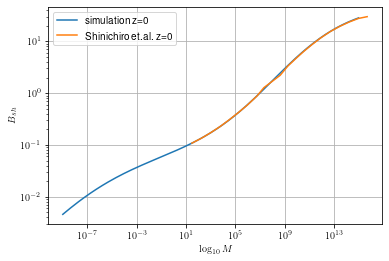

In [10]:
plt.plot((M_B_sh), array_B_sh, label=r'simulation z=0')
plt.plot(B_sh_0_shin[:,0], B_sh_0_shin[:,1], label=r'Shinichiro et.al. z=0')
#plt.plot(B_ratio_nfw[:,0], B_ratio_nfw[:,1], label=r'P2SAD')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\log_{10}{M}$')
plt.ylabel(r'$B_{sh}$')
#plt.xlim(1e-6, 1e13)
#plt.ylim(1e-1,1e4)
plt.grid()
plt.legend()

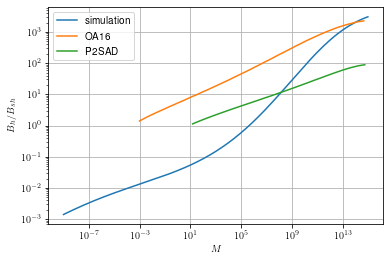

In [11]:
plt.plot((M_B_sh), array_B_sh*1e3/ (array_B_h), label=r'simulation')
plt.plot(B_ratio_oa16[:,0], B_ratio_oa16[:,1], label=r'OA16')
plt.plot(B_ratio_nfw[:,0], B_ratio_nfw[:,1], label=r'P2SAD')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$M$')
plt.ylabel(r'$B_{h}/B_{sh}$')
#plt.xlim(1e-6, 1e13)

#plt.ylim(1e-1,1e4)
plt.grid()
plt.legend()

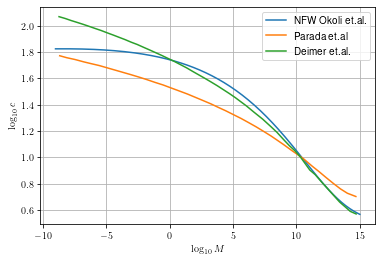

In [12]:
plt.plot(np.log10(M_B_sh), np.log10(c_nfw), label='NFW Okoli et.al.')
plt.plot(c_parada[:,0], c_parada[:,1], label='Parada et.al')
plt.plot(c_deimer[:,0], c_deimer[:,1], label='Deimer et.al.')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r'$\log_{10}{M}$')
plt.ylabel(r'$\log_{10}{c}$')
plt.grid()
plt.legend()
# plt.xlim(1e3, 1e7)

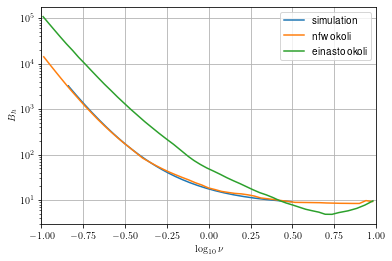

In [13]:
plt.plot(np.log10(peak_height), (array_B_h), label='simulation')
plt.plot(B_nfw_k16[:,0], B_nfw_k16[:,1], label='nfw okoli')
plt.plot(B_ein_k16[:,0], B_ein_k16[:,1], label='einasto okoli')
#plt.plot(np.log10(peak_height), G[:,0], label='Lopez et.al.')
#plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\log_{10}{\nu}$')
plt.ylabel(r'${B_{h}}$')
plt.xlim(-1,1)
#plt.ylim(1,1e5)
plt.grid()
plt.legend()

In [14]:
np.trapz(array_B_sh, x=M_B_sh)*(5.5e-6)**2

781048.3627294655

In [15]:
aa = np.array([dm2nu.B_sh(z_)[0] for z_ in z])

In [16]:
b_int_m

NameError: name 'b_int_m' is not defined

In [ ]:
np.trapz(b_int_m,
            x=z,
            axis=0)

1607089515842305.0

In [17]:
z[0], z[-1]

(0.0, 7.0)

In [18]:
quad(dm2nu._G_deimer, 5, 7)

(779.5040775234862, 2.1274559003359172e-06)

In [19]:
G_b = dm2nu._G_deimer(z)

In [20]:
G_e3 = dm2nu._G_lopez(z)

In [21]:
pickle.dump(G_e3, open("../data/tmp_files/G_sime3_wo_pi.pkl", "wb"))
G_e9 = pickle.load(open("../data/tmp_files/G_sime9_wo_pi.pkl", "rb"))

In [22]:
G_a = dm2nu._G_artsen(z)

In [23]:
G_e9.shape

(1000,)

In [24]:
G_o = dm2nu.B_nfw(z)

/home/kruteesh/miniconda3/envs/pdm/lib/python3.9/site-packages/numpy/core/_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: x and y must have same first dimension, but have shapes (10,) and (2,)

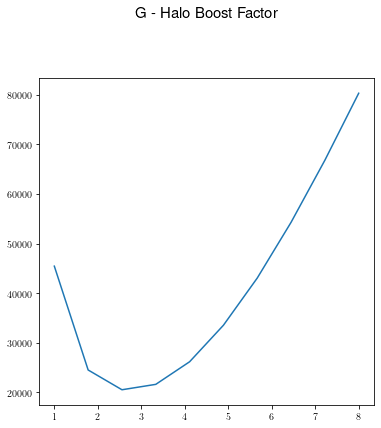

In [25]:
figure, ax1 = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True) 
ax1.set_title(r'G - Halo Boost Factor', y=1.17, fontsize=fontsize)
ax1.plot(((1+z)), ((1+z)**3) * G_e3, label=r'this sim M low 1e-3 Msun')
#ax1.plot(((1+z)), ((1+z)**3) * G_e9, label=r'this sim M low 1e-9 Msun')
#ax1.step((1+z), ((1+z)**3) * G_b, label=r'Deimer Profile')
ax1.step((1+z), G_o, label=r'Artsen Profile')
#ax1.plot((G_watson_l[:,0]), G_watson_l[:, 1], label=r'Carlos (Watson) et. al. lower')

ax1.plot((1+z), G_wat_spl, label=r'Carlos(Watson) et. al.')

ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.set_xlabel(r'$(1+z)$ ', fontsize=fontsize)
ax1.set_ylabel(r'$(1+z)^3 \times G(z)$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
#ax1.set_xlim(1, 200)
ax1.set_ylim(1e1,1e30)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(0.95, +1.1),
                 ncol=2, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)
plt.grid()
# ---------------------------------------------
# Showing the image
plt.show()
#figure.savefig(PICS + "Final_flux"+".png",
#               bbox_inches='tight', dpi=export_dpi, facecolor='white')


In [26]:
m_grid = [100, 1e3, 1e4, 1e5]

In [27]:
Mass = np.logspace(3, 18, base=10)
sigma_sim = np.array([dm2nu._sigma_lopez(m) for m in Mass])
sigma_watson = np.loadtxt('../data/sigma_watson.csv', delimiter=",")
sigma_watson = sigma_watson[sigma_watson[:, 0].argsort()]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


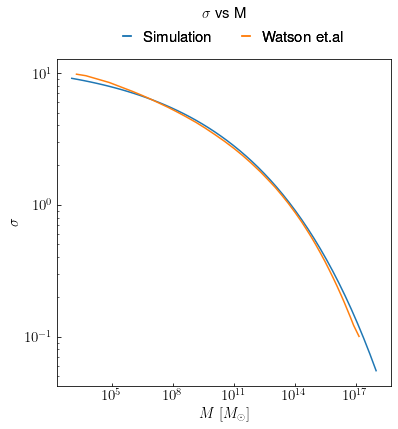

In [28]:
figure, ax1 = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True) 
ax1.set_title(r'$\sigma$ vs M', fontsize=fontsize, y=1.11)

ax1.plot(Mass, sigma_sim, label=r'Simulation')
ax1.plot(sigma_watson[:, 0], sigma_watson[:, 1], label=r"Watson et.al")
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.set_xlabel(r'$M$ $[M_{\odot}]$ ', fontsize=fontsize)
ax1.set_ylabel(r'$\sigma$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
#ax1.set_xlim(1, 20)
#ax1.set_ylim(1e4,1e6)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(0.9, +1.07),
                 ncol=2, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)
# ---------------------------------------------
# Showing the image
plt.show()
figure.savefig(PICS + "sigma_M"+".png",
               bbox_inches='tight', dpi=export_dpi, facecolor='white')


In [29]:
Mass_f_sig = np.logspace(10, 17, base=10)
ln_f_178 = np.log(np.array([dm2nu._f_178(m, 0) for m in Mass_f_sig]))
ln_f_200 = np.log(np.array([dm2nu._f_delta(m, 0, 200) for m in Mass_f_sig]))
lnsigma_1 = np.array([dm2nu._lnsigma_1(m) for m in Mass_f_sig])
ln_f_wa = np.loadtxt('../data/ln_f_watson.csv', delimiter=",")
ln_f_wa = ln_f_wa[ln_f_wa[:, 0].argsort()]

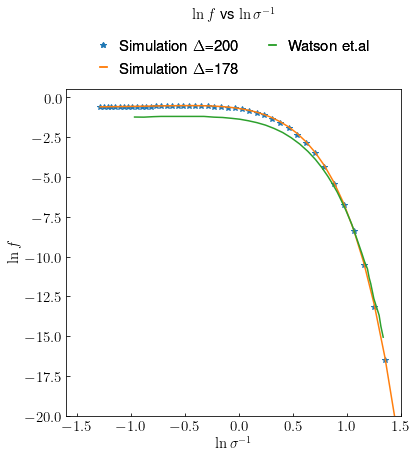

In [30]:
fig, ax1 = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True) 
ax1.set_title(r'$\ln{f}$ vs $\ln{\sigma^{-1}}$', y=1.2, fontsize=fontsize)

ax1.plot(lnsigma_1, ln_f_200, '*', label=r'Simulation $\Delta$=200')

ax1.plot(lnsigma_1, ln_f_178, label=r'Simulation $\Delta$=178')
ax1.plot(ln_f_wa[:, 0], ln_f_wa[:, 1], label=r"Watson et.al")
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.set_xlabel(r'$\ln{\sigma^{-1}}$ ', fontsize=fontsize)
ax1.set_ylabel(r'$\ln{f}$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.set_xlim(-1.6, 1.5)
ax1.set_ylim(-20, 0.5)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(0.95, +1.1),
                 ncol=2, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)
# ---------------------------------------------
# Showing the image
fig.savefig(PICS + "lnf_lnsigma"+".png",
               bbox_inches='tight', dpi=export_dpi, facecolor='white')


plt.show()


In [31]:
Mass= np.linspace(1e-3, 1e12, 151)
z=np.linspace(1, 1e6,15)
c_nu = (dm2nu._c_nfw(Mass, z))


ValueError: operands could not be broadcast together with shapes (151,) (15,) 

NameError: name 'c_nu' is not defined

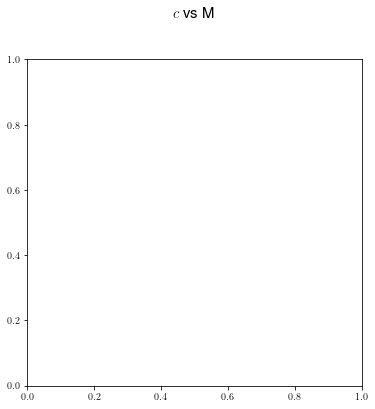

In [32]:
figure, ax1 = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True) 
ax1.set_title(r'$c$ vs M', fontsize=fontsize, y=1.11)

#ax1.plot(Mass, sigma_sim, label=r'Simulation')
ax1.plot(np.log10(Mass), np.log10(c_nu))
#ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.set_xlabel(r'$\log_{10} M/M_{\odot}$ ', fontsize=fontsize)
ax1.set_ylabel(r'$\log_{10} c$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
#ax1.set_xlim(1, 20)
#ax1.set_ylim(1e4,1e6)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(0.9, +1.07),
                 ncol=2, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)
# ---------------------------------------------
# Showing the image
plt.show()
figure.savefig(PICS + "sigma_M"+".png",
               bbox_inches='tight', dpi=export_dpi, facecolor='white')


In [33]:
dphi_2=np.loadtxt(open("../data/m_1e2.csv"), delimiter = ",")
dphi_2[dphi_2[:,0].sort()]

dphi_4=np.loadtxt(open("../data/m_1e4.csv"), delimiter = ",")
dphi_4[dphi_4[:,0].sort()]

dphi_6=np.loadtxt(open("../data/m_1e6.csv"), delimiter = ",")
dphi_6[dphi_6[:,0].sort()]
#dphi_ice=np.loadtxt(open("../data/icecube.csv"), delimiter = ",")
#dphi_ice[dphi_ice[:,0].sort()]
dphi_2=np.loadtxt(open("../data/m_1e2.csv"), delimiter = ",")
dphi_2[dphi_2[:,0].sort()]

dphi_4=np.loadtxt(open("../data/m_1e4.csv"), delimiter = ",")
dphi_4[dphi_4[:,0].sort()]

dphi_6=np.loadtxt(open("../data/m_1e6.csv"), delimiter = ",")
dphi_6[dphi_6[:,0].sort()]
#dphi_ice=np.loadtxt(open("../data/icecube.csv"), delimiter = ",")
#dphi_ice[dphi_ice[:,0].sort()]
dphi_4=UnivariateSpline(dphi_4[:,0],dphi_4[:,1],k=1,s=0,ext=1)
#mass_grid[0],sv_grid[-1],mass_grid[-1],sv_grid[-1]
#dphi_ic=UnivariateSpline(dphi_ice[:,0],dphi_ice[:,1],k=1,s=0,ext=1)
dphi_6=UnivariateSpline(dphi_6[:,0],dphi_6[:,1],k=1,s=0, ext=1)
#dphi_2=UnivariateSpline(dphi_2[:,0],dphi_2[:,1],k=1,s=0, ext=1)
# Grids
mass_grid = config['simulation parameters']['mass grid']
sv_grid = config['simulation parameters']['sv grid']
m_2_id = find_nearest(mass_grid, 1e2)
m_3_id = find_nearest(mass_grid, 1e3)
m_4_id = find_nearest(mass_grid, 1e4)
m_5_id = find_nearest(mass_grid, 1e5)
m_6_id = find_nearest(mass_grid, 1e6)
sv_7 = find_nearest(sv_grid, 7e-23)
sv_56 = find_nearest(sv_grid, 5.6e-23)
# The limit calculation


In [34]:
nu_e = pd.read_csv(open('../data/Li_project/nu_e.dat', 'rb'), delim_whitespace=True)

In [35]:
nu_e

,mDM,"Log[10,x]",eL,eR,e,\[Mu]L,\[Mu]R,\[Mu],\[Tau]L,\[Tau]R,...,Z,g,\[Gamma],h,\[Nu]e,\[Nu]\[Mu],\[Nu]\[Tau],V->e,V->\[Mu],V->\[Tau]
0,5,-8.90,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,5,-8.85,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,5,-8.80,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,5,-8.75,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,5,-8.70,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11093,100000,-0.20,0.144074,0.000692,0.072383,0.524696,0.715321,0.620008,0.110050,0.145143,...,0.145251,0.000286,0.044073,0.095100,0.102653,0.225569,0.032903,0.0,0.326558,0.017237
11094,100000,-0.15,0.185505,0.000531,0.093018,0.382060,0.521692,0.451876,0.077593,0.102191,...,0.142884,0.000113,0.042088,0.087957,0.223359,0.208894,0.022130,0.0,0.199903,0.007814
11095,100000,-0.10,0.270209,0.000359,0.135284,0.233641,0.319224,0.276432,0.046798,0.061354,...,0.140611,0.000044,0.039676,0.080761,1.364648,0.227602,0.013008,0.0,0.109475,0.003194
11096,100000,-0.05,0.516782,0.000177,0.258479,0.118539,0.162355,0.140447,0.023600,0.031029,...,0.128199,0.000018,0.032712,0.065415,5.571369,0.361184,0.005999,0.0,0.052107,0.001164


In [36]:
m_5 = nu_e[nu_e['mDM'] == 5]

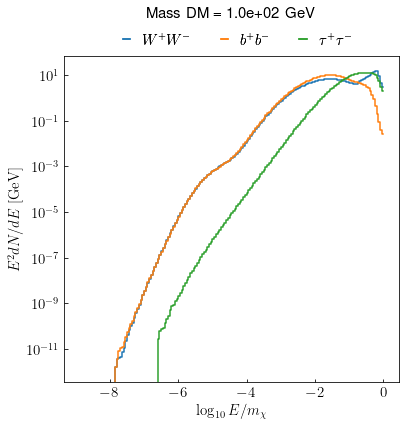

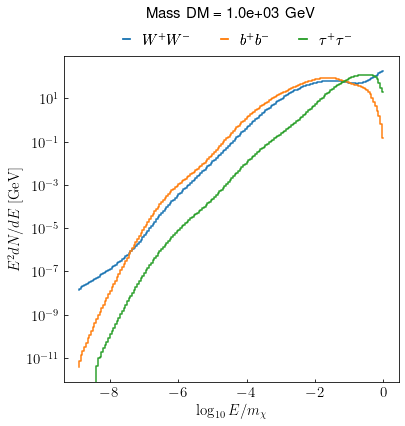

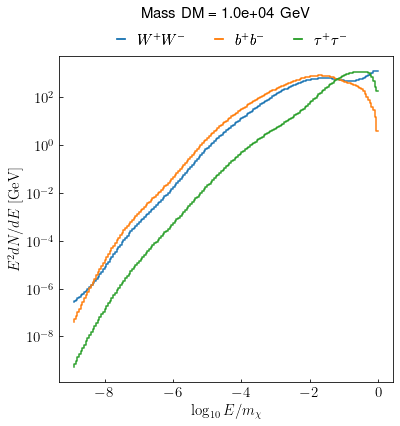

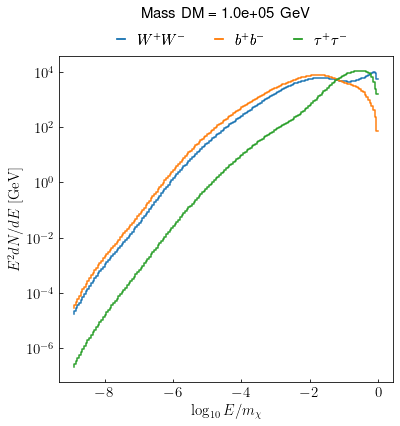

In [78]:
name_p = ['W^{+}W^{-}', 'b^{+}b^{-}', r'$\tau^{+}\tau^{-}$']
for i,m in enumerate(m_grid):
    figure, ax1 = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True)    
    ax1.set_title('Mass DM = %.1e GeV' % (m), y=1.1, fontsize=fontsize)
    
    for j,p in enumerate(['W', 'b', '\[Tau]']):
        e_grid = m * 10**nu_e[nu_e['mDM'] == m]['Log[10,x]']
        x = nu_e[nu_e['mDM'] == m]['Log[10,x]']
        dNdlogx = nu_e[nu_e['mDM'] == m][p]

        ax1.step(x, (dNdlogx/(m*10**x)) *(m*10**x)**2, label=r'$%s$' % (name_p[j]))

    ax1.set_yscale("log")
    #ax1.set_xscale("log")
    ax1.set_xlabel(r'$\log_{10}{E/m_{\chi}}$ ', fontsize=fontsize)
    ax1.set_ylabel(r'$ E^2 dN/dE$ $[\textrm{GeV}]$', fontsize=fontsize)
    ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
    ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
    #plt.legend()
    #ax1.set_xlim(0, 1)
    #ax1.set_ylim(1e-4,1e-2)
    h, l = ax1.get_legend_handles_labels()
    lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(0.9, +1.05),
                     ncol=3, fontsize=fontsize, handlelength=h_length,
                     fancybox=True, frameon=False)
    ax1.add_artist(lgd1)

    # ---------------------------------------------
    # Showing the image
    plt.show()
    figure.savefig(PICS + "Final_spectrum_"+"%.1e" % (m)+".png",
                   bbox_inches='tight', dpi=export_dpi, facecolor='white')


In [38]:
nu_e = pd.read_csv(open('../data/Li_project/nu_e.dat', 'rb'), delim_whitespace=True)
phi_nue = []
phi_dm2nu = []
phi_burkert = []
phi_okoli = []
for i,m in enumerate(m_grid):
    e_grid = m * 10**nu_e[nu_e['mDM'] == m]['Log[10,x]']
    dNdlogE = nu_e[nu_e['mDM'] == m]['\\[Nu]e']
    dNdlogE_mc = UnivariateSpline(e_grid, dNdlogE, k=1, s=0, ext=1)(e_grid_mceq)
    phi_nue.append((dm2nu.dphide_channel( e_grid, m, 2.5e23)) * np.array(dNdlogE_mc) / (np.array(e_grid_mceq)*np.log(10)))
    #phi_okoli.append((dm2nu._dphide_okoli_nfw(e_grid_mceq, m, 7e-23)))
    #phi_dm2nu.append((dm2nu.dphide_channel(e_grid_mceq, m, 7e-23)))
    #phi_burkert.append((dm2nu._dphi_de_c_burkert(e_grid_mceq, m, 5.62e-23)))

KeyError: "['All'] not in index"

In [ ]:
# pickle.dump(phi_dm2nu, open('../data/channel_numu.pkl', ""))
nu_e[nu_e['mDM'] == m].keys()

Index(['mDM', 'Log[10,x]', 'eL', 'eR', 'e', '\[Mu]L', '\[Mu]R', '\[Mu]',
       '\[Tau]L', '\[Tau]R', '\[Tau]', 'q', 'c', 'b', 't', 'WL', 'WT', 'W',
       'ZL', 'ZT', 'Z', 'g', '\[Gamma]', 'h', '\[Nu]e', '\[Nu]\[Mu]',
       '\[Nu]\[Tau]', 'V->e', 'V->\[Mu]', 'V->\[Tau]'],
      dtype='object')

100
1000.0
10000.0
100000.0


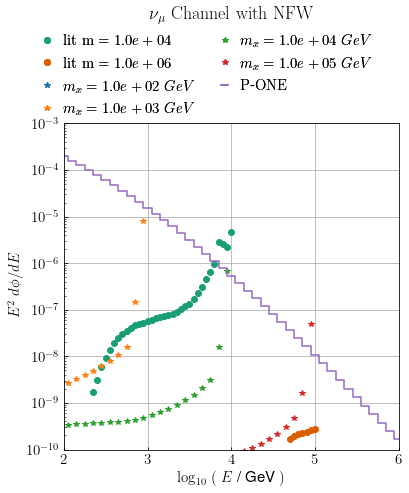

In [ ]:
figure, ax1 = plt.subplots(1, figsize=(std_size,std_size), sharex=True) 
ax1.set_title(r'$ \nu_{\mu} \textrm{ Channel with NFW}$' , y=1.3, fontsize=fontsize+3)
#ax1.step(np.log10(e_grid), dphi_2(e_grid),'o', color="y", label=r"$\textrm{lit m} = %.1e$" % (1e2))
ax1.step(np.log10(e_grid), dphi_4(e_grid), 'o', color=color_4, label=r"$\textrm{lit m} = %.1e$" % (1e4))
ax1.step(np.log10(e_grid), dphi_6(e_grid), 'o',color=color_6, label=r"$\textrm{lit m} = %.1e$" % (1e6))
#nfw_flux_2 = (dm2nu.extra_galactic_flux_nfw(e_grid,mass_grid[m_2_id],sv_grid[sv_7]))
#nfw_flux_3 = (dm2nu.extra_galactic_flux_nfw(e_grid,mass_grid[m_3_id],sv_grid[sv_7]))# + pdm._dm_nu.galactic_flux(e_grid,mass_grid[3],sv_grid[sv_56], 2 , 2.3e23)
#nfw_flux_4 = (dm2nu.extra_galactic_flux_nfw(e_grid,mass_grid[m_4_id],sv_grid[sv_7]))# + pdm._dm_nu.galactic_flux(e_grid,mass_grid[26],sv_grid[sv_56], 2 , 2.3e23)
#nfw_flux_6 = (dm2nu.extra_galactic_flux_nfw(e_grid,mass_grid[m_6_id],sv_grid[sv_7]))# + pdm._dm_nu.galactic_flux(e_grid,mass_grid[-1],sv_grid[sv_56], 2 , 2.3e23)
#nfw_flux_5 = (dm2nu.extra_galactic_flux_nfw(e_grid,mass_grid[m_5_id],sv_grid[sv_7]))# + pdm._dm_nu.galactic_flux(e_grid,mass_grid[-1],sv_grid[sv_56], 2 , 2.3e23)


for i,m in enumerate(m_grid):
    print(m)
    e_grid = m * 10**nu_e[nu_e['mDM'] == m]['Log[10,x]']
    dNdE = nu_e[nu_e['mDM'] == m]['\\[Nu]\\[Mu]']
    #ax1.step( np.log10(e_grid_mceq), abs(phi_dm2nu[i]) * e_grid_mceq**2, label=r'ex g')
    ax1.step(np.log10(e_grid_mceq), ((phi_nue[i])) * e_grid_mceq**2, "*", label=r'$m_{x} = %.1e$ $GeV$' % (m))
    #ax1.step(np.log10(e_grid_mceq), (phi_okoli[i]) * e_grid_mceq**2, ".", label=r'Okoli')
ax1.step(np.log10(e_grid_mceq) , shower_po * e_grid_mceq**2, label=r'$\textrm{P}$-$\textrm{ONE}$')
ax1.set_yscale("log")
#ax1.set_xscale("log")
ax1.set_xlabel(r'$\log_{10}$ $($ $E$ / GeV $)$ ', fontsize=fontsize)
ax1.set_ylabel(r'$E^2$ $d\phi / dE $', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.set_xlim(2, 6)
ax1.set_ylim(1e-10,1e-3)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(0.95, +1.15),
                 ncol=2, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)
# ---------------------------------------------
# Showing the image
plt.grid()
plt.show()
figure.savefig(PICS + "Final_flux_Li"+".png",
               bbox_inches='tight', dpi=export_dpi, facecolor='white')

In [ ]:
(phi_nue[2])*e_grid_mceq**2

array([3.85277590e-13, 5.46965722e-13, 7.72720916e-13, 1.08601642e-12,
       1.51744912e-12, 2.10451326e-12, 2.89833705e-12, 3.96178687e-12,
       5.36825623e-12, 7.21515187e-12, 9.61660886e-12, 1.26935917e-11,
       1.66091954e-11, 2.15357001e-11, 2.76317462e-11, 3.51157706e-11,
       4.41888943e-11, 5.49723801e-11, 6.76715743e-11, 8.24095986e-11,
       9.91046975e-11, 1.17815223e-10, 1.38406094e-10, 1.60404603e-10,
       1.83654177e-10, 2.07703858e-10, 2.31652587e-10, 2.55161996e-10,
       2.77639849e-10, 2.97968787e-10, 3.16225222e-10, 3.31987046e-10,
       3.44706013e-10, 3.55097744e-10, 3.63683748e-10, 3.71477775e-10,
       3.80438524e-10, 3.92467212e-10, 4.11673935e-10, 4.40675906e-10,
       4.83338727e-10, 5.46135571e-10, 6.32811531e-10, 7.51132800e-10,
       9.15448964e-10, 1.14648759e-09, 1.48905035e-09, 2.06402678e-09,
       3.14766800e-09, 1.59234338e-08, 6.89340421e-07, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [ ]:
config['general']['detector'] = 'POne'
config['general']['pone type'] = 'old'
config['general']['density'] = 'NFW'  # 'NFW'
config['general']["channel"] = "W" 
config['pone']['smearing'] = 'unsmeared'

config['pone']['low E sigma'] = {'numu': 0.45,
                                 'nue': 0.45,
                                 'nutau': 0.45}
config['pone']['high E sigma'] = {'numu': 0.25,
                                 'nue': 0.12,
                                 'nutau': 0.12}


In [ ]:
#pdm = PDM()

In [ ]:
mass_grid = config["simulation parameters"]["mass grid"]
sv_grid = config["simulation parameters"]["sv grid"]

In [ ]:
mass_grid

[5,
 6,
 8,
 10,
 15,
 20,
 25,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 180,
 200,
 220,
 240,
 260,
 280,
 300,
 330,
 360,
 400,
 450,
 500,
 550,
 600,
 650,
 700,
 750,
 800,
 900,
 1000,
 1100,
 1200,
 1300,
 1500,
 1700,
 2000,
 2500,
 3000,
 4000,
 5000,
 6000,
 7000,
 8000,
 9000,
 10000,
 12000,
 15000,
 20000,
 30000,
 50000,
 100000]

In [ ]:
pdm.results['numu']

NameError: name 'pdm' is not defined

In [ ]:
# Loading comparison data
th_cl = np.loadtxt(open("../data/thermal_relic.csv"), delimiter = ",")
unitarity = np.loadtxt(open('../data/Unitarity_bound.csv'), delimiter = ',')
cl_lit = np.loadtxt('../data/CL_PONE.csv', delimiter=",")
W_lit = np.loadtxt(open('../data/ICE_TAU.csv'), delimiter = ',')
W_lit = (W_lit[W_lit[:, 0].argsort()])
cl_lit = (cl_lit[cl_lit[:, 0].argsort()])
unitarity = (unitarity[unitarity[:, 0].argsort()])

#limits_ice = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/28_03_desk/data/limits_results_IceCube.pkl','rb'))
limits_pone_unsm = pickle.load(open("../data/nfw_unsmea_limits.pkl","rb"))
#limits_com = pickle.load(open("/home/kruteesh/Desktop/dm_data_server/14_03/data/limits_results.pkl", "rb"))
#limits_pone_unsm = pickle.load(open("../data/28_03_02/unsmeared/limits_results_POne_unsm.pkl","rb"))

limits_pone_45_25= pickle.load(open("../data/14_04/smeared/45_25/limits_results_POne_sm_NFW.pkl","rb"))

limits_pone_35_15= pickle.load(open("../data/14_04/smeared/35_15/limits_results_POne_sm.pkl","rb"))

limits_pone_25_10= pickle.load(open("../data/14_04/smeared/25_10/limits_results_POne_sm.pkl","rb"))

limits_pone_15_009= pickle.load(open("../data/14_04/smeared/15_009/limits_results_POne_sm.pkl","rb"))


cl_lit_ice = np.loadtxt('../data/IceCube_HE.csv', delimiter=",")
cl_lit_ice = (cl_lit_ice[cl_lit_ice[:, 0].argsort()])
xx,yy = np.meshgrid(np.log10( np.logspace(1, 6, 20)),np.log10( np.logspace(1, 6, 20)))

In [ ]:
xv, yv = np.meshgrid((np.log10(mass_grid)), (np.log10(sv_grid)))


With Smearing

NameError: name 'pdm' is not defined

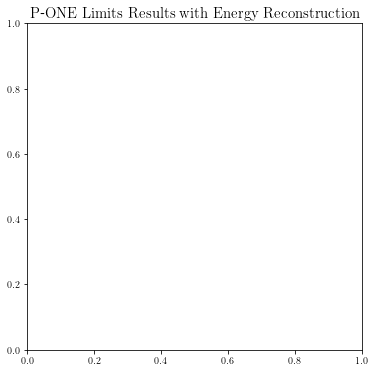

In [ ]:
color = ['black', 'orange', 'purple']
color_sm = ['red', 'black', 'purple']
color_pa = ['']
color_pa = ['']
color_pa = ['']
color_pa = ['']

ll = ['-','--', '-.', 'dotted']
 # std_size, std_size * 6. / 8.),
for j,i in enumerate(config["pone"]["specific particle scaling"].keys()):
    # Limits
    # ---------------------------------------------
    # Setup

    figure, (ax1) = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True) 
    # ---------------------------------------------
    # Plotting
    ax1.set_title(r'$\textrm{P}$-$\textrm{ONE Limits Results with Energy Reconstruction}$',fontsize=fontsize)  # +' Scaling Correction = '+str(config['advanced']['scaling correction'])
    
    #   ax1.imshow(pdm.results[i], origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)), min(np.log10(sv_grid)), max(np.log10(sv_grid)),
    #                                      ))
    ax1.contour( xv, yv,  pdm.results[i], levels = [0.9], colors=color_sm[j],  linestyles='-',
               origin='lower')
    #ax1.contour(pdm.results[i], levels = [0.9], colors=color_sm[j],  linestyles='-',
    #           origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)), min(np.log10(sv_grid)), max(np.log10(sv_grid)),
    #                                   ))
    
    # ax1.contour(limits_pone_unsm[i], levels = [0.9], colors=color_pone,  linestyles=ll[0],
    #              origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
    #                                      min(np.log10(sv_grid)), max(np.log10(sv_grid))))
    
    #ax1.plot(np.log10(cl_lit[:, 0]), np.log10(cl_lit[:, 1]), 'g', label='literature P-ONE')
    
    #ax1.plot(np.log10(cl_lit_ice[:, 0]), np.log10(cl_lit_ice[:, 1]),'m',label='literature  IceCube')
    
    ax1.plot(np.log10(th_cl[:, 0]), np.log10(th_cl[:, 1]), 'b', 
             label='Thermal Relic Abundance')
    
    #ax1.plot(np.log10(unitarity[:, 0]), np.log10(unitarity[:, 1]), '.k', 
    #         label='Unitarity Bound')
    # ---------------------------------------------
    # Axis options
    ax1.set_xscale("linear")
    ax1.set_yscale("linear")
    ax1.set_xlabel(r"$\log_{10}$ $m_{\chi}$[\textrm{GeV}]", fontsize=fontsize)
    ax1.set_ylabel(r"$\log_{10}$ $<\sigma \nu>$[$cm^{3} s^{-1}$]", fontsize=fontsize)
    ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize)
    ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize)
    ax1.set_xlim(3.5, max(np.log10(mass_grid)))
    ax1.set_ylim(min(np.log10(sv_grid)), -21)  # 

    h, l = ax1.get_legend_handles_labels()
    lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(0.95, +0.9),
                     ncol=2, fontsize=fontsize, handlelength=h_length,
                     fancybox=True, frameon=False)
    ax1.add_artist(lgd1)
    legend_elements = [Line2D([0], [0], color=color_sm[j], lw=1.3),
                       Line2D([0], [0], color=color_pone, lw=1.3)
                  ]
    labels = [r'$\textrm{W boson channel}$',
           r'$\textrm{All channel}$',
           ]
    lgd2 = ax1.legend(legend_elements, labels, loc=7, bbox_to_anchor=(0.765, +0.799),
                     ncol=1, fontsize=fontsize, handlelength=h_length,
                     fancybox=True, frameon=False)
    ax1.add_artist(lgd2)
    # ---------------------------------------------
    # Showing the image
    plt.show()
    # ---------------------------------------------
    # Storing the image
    figure.savefig(PICS + "Limits_Example_all_%s.png" %(i),
               bbox_inches='tight', dpi=export_dpi,  facecolor='white')
    break

Without Smearing

In [ ]:
color = ['black', 'orange', 'purple']
color_sm = ['red', 'black', 'purple']
color_pa = ['']
color_pa = ['']
color_pa = ['']
color_pa = ['']

ll = ['-','--', '-.', 'dotted']
 # std_size, std_size * 6. / 8.),
for j,i in enumerate(config["pone"]["specific particle scaling"].keys()):
    # Limits
    # ---------------------------------------------
    # Setup

    figure, (ax1) = plt.subplots(1, 1, figsize=(std_size,std_size), sharex=True) 
    # ---------------------------------------------
    # Plotting
    #ax1.set_title(r'',fontsize=fontsize)  # +' Scaling Correction = '+str(config['advanced']['scaling correction'])
    #ax1.imshow(pdm.results[i], origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)), min(np.log10(sv_grid)), max(np.log10(sv_grid))))

    ax1.contour(pdm.results[i], levels = [0.9], color=color_pone, linestyles='-',
               origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                       min(np.log10(sv_grid)), max(np.log10(sv_grid))))
    
    #ax1.contour(limits_pone_unsm[i], levels = [0.9], colors=color_pone,  linestyles=ll[0],
    #             origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
    #                                     min(np.log10(sv_grid)), max(np.log10(sv_grid))))
# 
    # ax1.contour(limits_pone_45_25[i], levels = [0.9], colors=color_pone,  linestyles=ll[0],
    #             origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
    #                                     min(np.log10(sv_grid)), max(np.log10(sv_grid))))
    #ax1.contour(limits_pone_35_15[i], levels = [0.9], colors=color_sm[j],  linestyles=ll[1],
    #             origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
    #                                     min(np.log10(sv_grid)), max(np.log10(sv_grid))))
    # ax1.contour(limits_pone_25_10[i], levels = [0.9], colors=color_sm[j],  linestyles=ll[2],
    #             origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
    #                                     min(np.log10(sv_grid)), max(np.log10(sv_grid))))
    # ax1.contour(limits_pone_15_009[i], levels = [0.9], colors=color_sm[j],  linestyles=ll[3],
    #             origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
    #                                     min(np.log10(sv_grid)), max(np.log10(sv_grid))))

    #break
    #ax1.contour(limits_ice["numu"], levels=[0.9], colors='yellow',origin='lower',linestyles='-',
    #                            extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
    #                                    min(np.log10(sv_grid)), max(np.log10(sv_grid))))#
    #ax1.contour(limits_pone_unsm["numu"], levels=[0.9], colors='green',origin='lower',linestyles='-.',
    #                            extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
    #                                    min(np.log10(sv_grid)), max(np.log10(sv_grid))))
    
    #ax1.plot(np.log10(cl_lit[:, 0]), np.log10(cl_lit[:, 1]), 'g', label='literature P-ONE')
    
    #ax1.plot(np.log10(cl_lit_ice[:, 0]), np.log10(cl_lit_ice[:, 1]),'m',label='literature  IceCube')
    ax1.plot(np.log10(W_lit[:, 0]), np.log10(W_lit[:, 1]), color='r', 
             label=r'$\textrm{Ice }$-$\textrm{79 } \tau^{+}\tau^{-}$')
    ax1.plot(np.log10(th_cl[:, 0]), np.log10(th_cl[:, 1]), 'b', 
             label=r'$\textrm{Thermal Relic Abundance}$')
    ax1.plot(np.log10(unitarity[:, 0]), np.log10(unitarity[:, 1]), '.', color='k', 
             label=r'$\textrm{Unitarity Bound}$')
    # ---------------------------------------------
    # Axis options
    ax1.set_xscale("linear")
    ax1.set_yscale("linear")
    ax1.set_xlabel(r"$\log_{10}$ $m_{\chi}$[\textrm{GeV}]", fontsize=fontsize)
    ax1.set_ylabel(r"$\log_{10}$ $<\sigma \nu>$[$cm^{3} s^{-1}$]", fontsize=fontsize)
    ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize)
    ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize)
    ax1.set_xlim(2, 4.5)
    ax1.set_ylim(min(np.log10(sv_grid)), -19)  # 
    #ax1.text(3.5, -23.7, "IceCube Simulation", fontsize=fontsize)

    #ax1.text(3.2, -24.8, r"P-ONE $\nu_\mu$", fontsize=fontsize)
    #ax1.text(3.2, -24.9, r" $\nu_e$", fontsize=fontsize)
    #ax1.text(3.1, -25.3, r" $\nu_\tau$", fontsize=fontsize)

    # ---------------------------------------------
    # Legend
    # plt.legend(fontsize=fontsize)
    h, l = ax1.get_legend_handles_labels()
    lgd1 = ax1.legend(h, l, loc=7, bbox_to_anchor=(1.09, +1.1),
                     ncol=2, fontsize=fontsize, handlelength=h_length,
                     fancybox=True, frameon=False)
    ax1.add_artist(lgd1)
    legend_elements = [Line2D([0], [0], color=color_pone, lw=1.3),
                   #Line2D([0], [0], linestyle='--', color=color_sm[j],  lw=1),
    #               Line2D([0], [0], color=color_pone, lw=1)
                   #Line2D([0], [0], linestyle='-.', color=color_sm[j],  lw=1.3),
                   #Line2D([0], [0], linestyle=':',  color=color_sm[j], lw=1),
                   #Line2D([0], [0], color=color_sm[j], linestyle='dotted', lw=2),
                  ]
    labels = [r'$\textrm{P}$-$\textrm{ONE[NFW] }  $ $\tau^{+}\tau^{-}$ $\textrm{Channel}$',
           #r'$\textrm{NFW}$, $\mu$ = [$0.35, 0.15$]',
    #       r'$\textrm{All channel}$',
           #r'0.15, 0.09'
           ]
    lgd2 = ax1.legend(legend_elements, labels, loc=7, bbox_to_anchor=(0.85, +0.3),
                     ncol=1, fontsize=fontsize, handlelength=h_length,
                     fancybox=True, frameon=False)
    ax1.add_artist(lgd2)
    # #h, _ = ax1.get_legend_handles_labels([legend_elements])
    #lgd2= ax1.legend(h, labels, loc=7, bbox_to_anchor=(1, 0.8),
    #                 ncol=1, fontsize=fontsize, handlelength=h_length,
    #                 fancybox=True, frameon=False)
    #ax1.add_artist(lgd2)
    ax1.set_title(r'$\tau^{+}\tau^{-} \textrm{ Channel with NFW profile}$', y = 1.2, fontsize=fontsize+1)
    # ---------------------------------------------
    # Showing the image
    plt.show()
    # ---------------------------------------------
    # Storing the image
    figure.savefig(PICS + "Limits_Example_W_%s.png" %(i),
               bbox_inches='tight', dpi=export_dpi,  facecolor='white')
    break